Dataset preview:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Statistical summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Datase

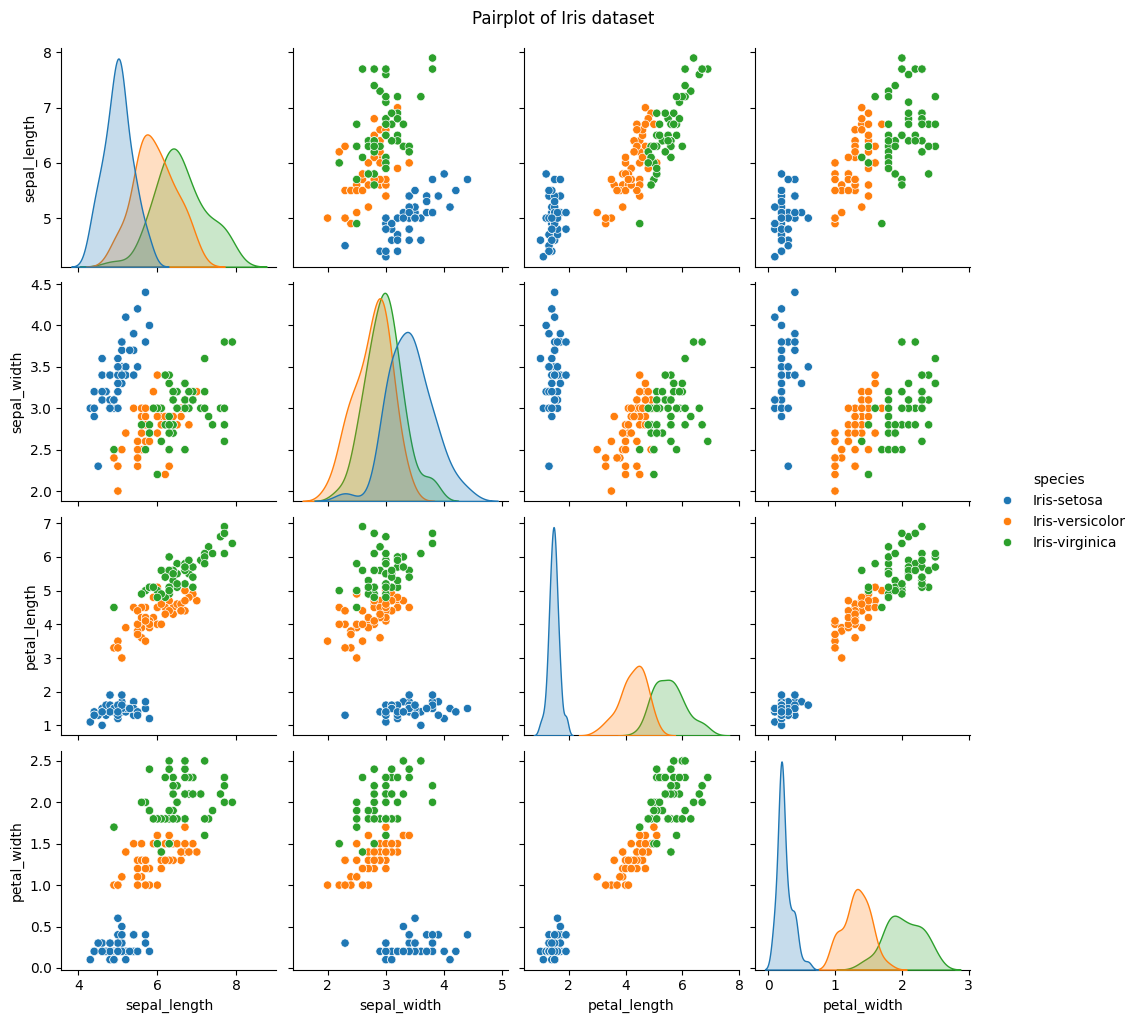

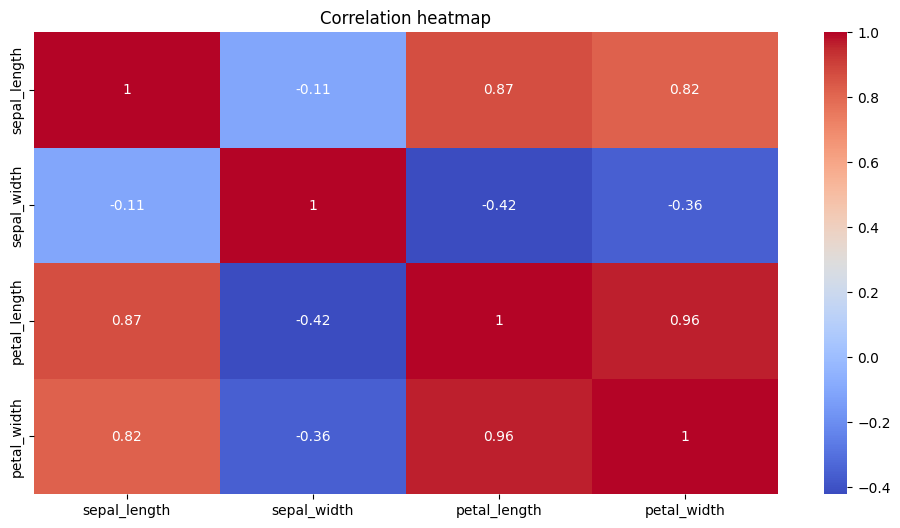


Model accuracy: 1.0

Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



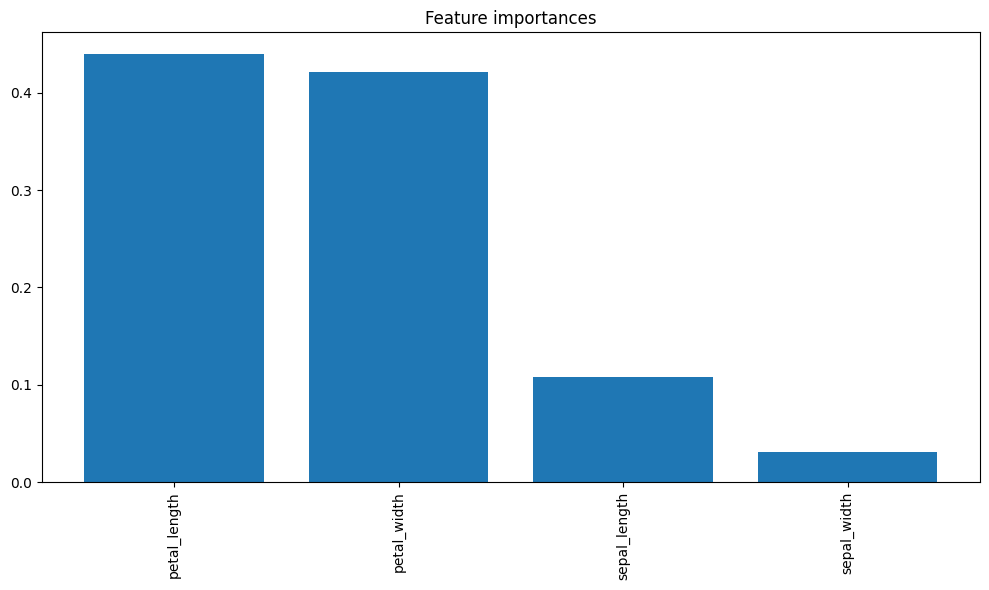


Predicted species for the example data: ['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the dataset
data = pd.read_csv('IRIS.csv')

# Display the first few rows of the dataset
print("Dataset preview:")
print(data.head())

# Statistical summary of the dataset
print("\nStatistical summary:")
print(data.describe())

# Information about the dataset
print("\nDataset information:")
print(data.info())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Visualizations
sns.pairplot(data, hue='species')
plt.suptitle("Pairplot of Iris dataset", y=1.02)
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(data.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

# Split the data into features and target
features = data.drop('species', axis=1)
target = data['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the RandomForest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the model
print('\nModel accuracy:', accuracy_score(y_test, predictions))
print('\nClassification report:')
print(classification_report(y_test, predictions))

# Visualize feature importance
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Example prediction
example_data = [[5.1, 3.5, 1.4, 0.2]]
example_prediction = classifier.predict(example_data)
print('\nPredicted species for the example data:', example_prediction)
